<a href="https://colab.research.google.com/github/Preteka/Deep-Learning-Lab/blob/main/dl7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top TF-IDF Terms per Document:
Document 1: [('plot', np.float64(1.0))]
Document 2: [('customer service', np.float64(0.7071067811865475)), ('customer', np.float64(0.7071067811865475))]
Document 3: [('book', np.float64(0.5)), ('boring slowpaced', np.float64(0.5)), ('boring', np.float64(0.5)), ('book quite', np.float64(0.5))]
Document 4: [('excellent', np.float64(0.3779644730092272)), ('excellent craftsmanship', np.float64(0.3779644730092272)), ('attention', np.float64(0.3779644730092272)), ('craftsmanship', np.float64(0.3779644730092272)), ('craftsmanship attention', np.float64(0.3779644730092272))]
Document 5: [('every time', np.float64(0.408248290463863)), ('every', np.float64(0.408248290463863)), ('app crashes', np.float64(0.408248290463863)), ('app', np.float64(0.408248290463863)), ('crashes', np.float64(0.408248290463863))]
Document 6: [('downtown', np.float64(0.4472135954999579)), ('dinner new', np.float64(0.4472135954999579)), ('amazing dinner', np.float64(0.4472135954999579)), (

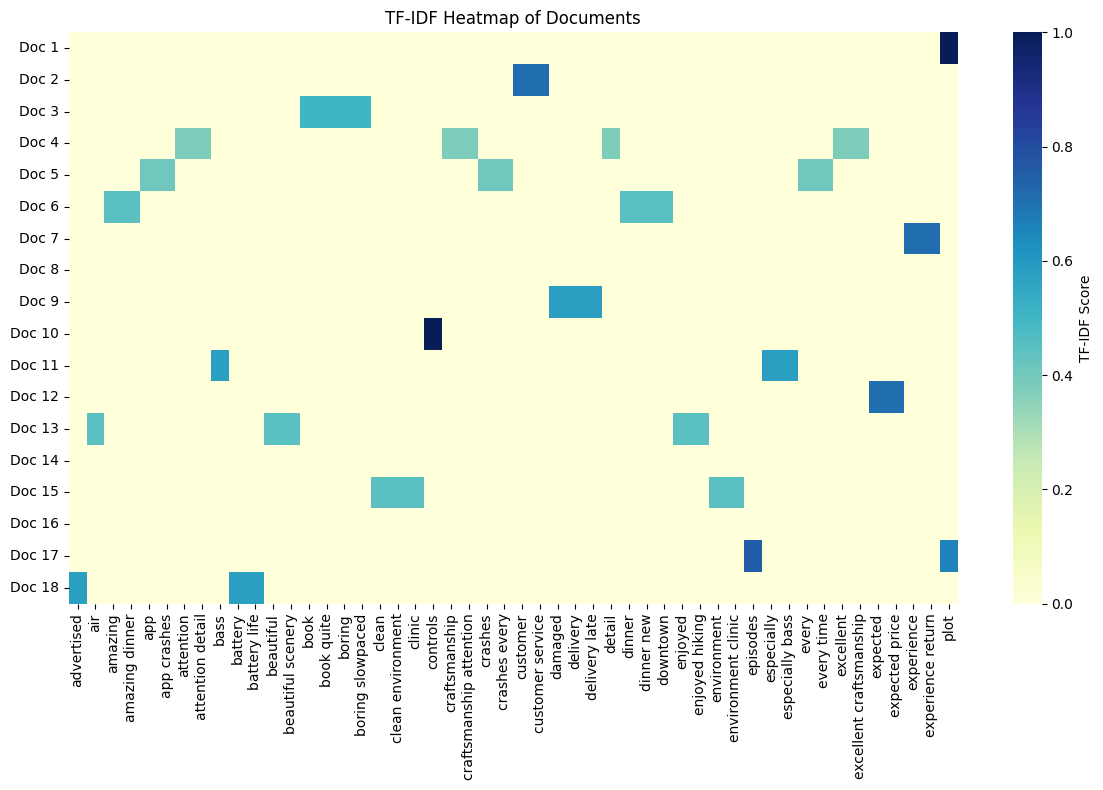

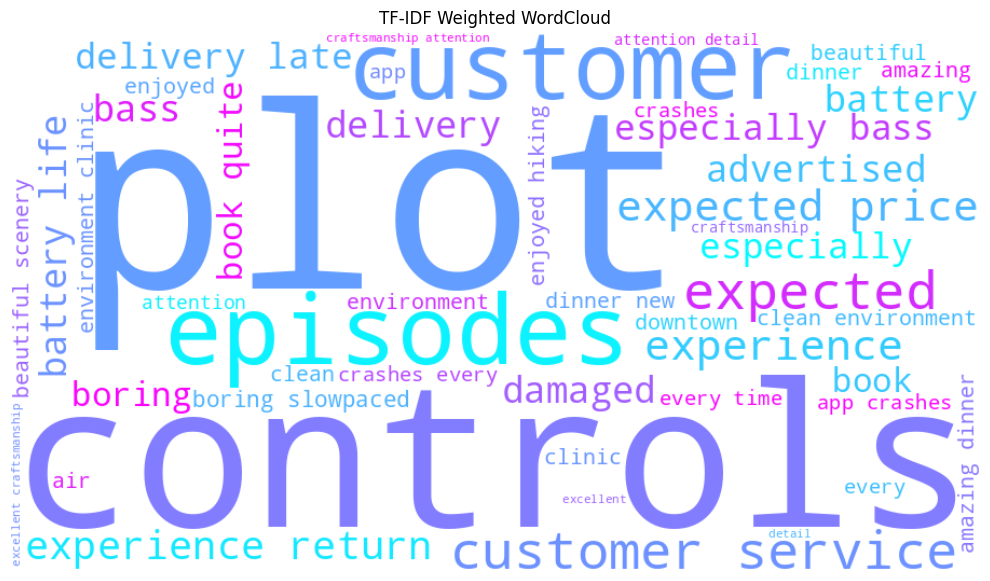

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')

# 1️⃣ Sample Data
data = {
    'text': [
        "The movie had stunning visuals but the plot was weak.",
        "Customer service was prompt and very helpful.",
        "I found the book to be quite boring and slow-paced.",
        "Excellent craftsmanship and attention to detail in this product.",
        "The app crashes every time I try to open it.",
        "Had an amazing dinner at the new Italian restaurant downtown.",
        "Terrible experience. I will not return.",
        "The software update improved performance significantly.",
        "Delivery was late and the package was damaged.",
        "Great user interface and very intuitive controls.",
        "Music quality is outstanding, especially the bass.",
        "Not impressed. Expected more for the price.",
        "Enjoyed the hiking trail — beautiful scenery and fresh air.",
        "Keyboard keys are too stiff and unresponsive.",
        "Friendly staff and a clean environment at the clinic.",
        "The laptop heats up quickly when gaming.",
        "Loved the plot twists in the final episodes!",
        "Battery life is shorter than advertised."
    ]
}
df = pd.DataFrame(data)

# 2️⃣ Text Preprocessing
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [w for w in text.split() if w not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess)

# 3️⃣ TF-IDF with unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50)
X = vectorizer.fit_transform(df['clean_text'])
feature_names = vectorizer.get_feature_names_out()

# 4️⃣ Show top TF-IDF terms for each document
print("\nTop TF-IDF Terms per Document:")
for i, doc in enumerate(df['clean_text']):
    scores = X[i].toarray()[0]
    top_idx = scores.argsort()[-5:][::-1]
    top_terms = [(feature_names[idx], scores[idx]) for idx in top_idx if scores[idx] > 0]
    print(f"Document {i+1}: {top_terms}")

# 5️⃣ Heatmap of TF-IDF (documents vs top features)
plt.figure(figsize=(12,8))
sns.heatmap(X.toarray(), cmap='YlGnBu', yticklabels=[f'Doc {i+1}' for i in range(X.shape[0])],
            xticklabels=feature_names, cbar_kws={'label':'TF-IDF Score'})
plt.xticks(rotation=90)
plt.title("TF-IDF Heatmap of Documents")
plt.tight_layout()
plt.show()

# 6️⃣ WordCloud of most important terms across all documents
from wordcloud import WordCloud
import numpy as np

tfidf_sum = np.sum(X.toarray(), axis=0)
tfidf_dict = {feature_names[i]: tfidf_sum[i] for i in range(len(feature_names))}

wordcloud = WordCloud(width=900, height=500, background_color='white',
                      colormap='cool', max_words=50).generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("TF-IDF Weighted WordCloud")
plt.show()
